# 1. Import and Install Dependencies

In [8]:
%pip install tensorflow opencv-python mediapipe scikit-learn matplotlib wandb

In [9]:
import tensorflow as tf

print(tf.__version__)
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("TensorFlow is using the following GPUs:")
    for gpu in gpus:
        print(gpu)
else:
    print("TensorFlow is not using any GPUs.")



2.16.1
TensorFlow is not using any GPUs.


In [10]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [11]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [12]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [13]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [14]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [15]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

c:\Users\zimmer\anaconda3\envs\win_deepsign\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [16]:
draw_landmarks(frame, results)
print(results.face_landmarks)

landmark {
  x: 0.253460318
  y: 0.720085442
  z: -0.0220838431
}
landmark {
  x: 0.241608739
  y: 0.682221949
  z: -0.0449697673
}
landmark {
  x: 0.253316611
  y: 0.69341886
  z: -0.0220558364
}
landmark {
  x: 0.241224095
  y: 0.639578104
  z: -0.0318083726
}
landmark {
  x: 0.240296721
  y: 0.669509053
  z: -0.0484546907
}
landmark {
  x: 0.243293464
  y: 0.652600169
  z: -0.0458275601
}
landmark {
  x: 0.255092919
  y: 0.609011054
  z: -0.0254020747
}
landmark {
  x: 0.209749877
  y: 0.60121721
  z: 0.0376270264
}
landmark {
  x: 0.257858902
  y: 0.569488585
  z: -0.0211732332
}
landmark {
  x: 0.25674203
  y: 0.550617099
  z: -0.0240450483
}
landmark {
  x: 0.25991565
  y: 0.487138391
  z: -0.0199642368
}
landmark {
  x: 0.254265636
  y: 0.72584337
  z: -0.0207921304
}
landmark {
  x: 0.256199121
  y: 0.730871499
  z: -0.017576471
}
landmark {
  x: 0.258645743
  y: 0.733508468
  z: -0.0134929735
}
landmark {
  x: 0.258947194
  y: 0.742623627
  z: -0.00920755602
}
landmark {
  x: 

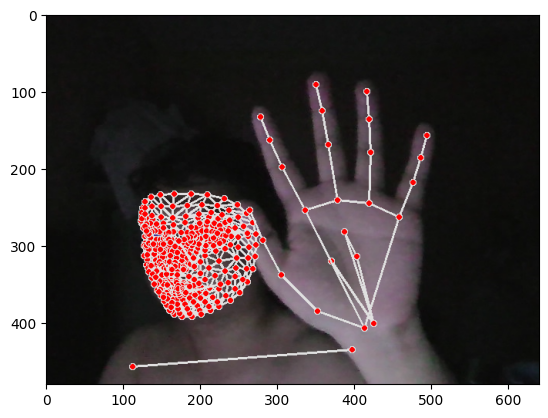

In [17]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [18]:
len(results.left_hand_landmarks.landmark)
print(results.pose_landmarks)

landmark {
  x: 0.300089777
  y: 0.682820737
  z: -0.78811872
  visibility: 0.998004377
}
landmark {
  x: 0.324774176
  y: 0.600539267
  z: -0.782052219
  visibility: 0.997723579
}
landmark {
  x: 0.347807974
  y: 0.593330383
  z: -0.78184247
  visibility: 0.997897208
}
landmark {
  x: 0.369670153
  y: 0.585900247
  z: -0.781356692
  visibility: 0.997852147
}
landmark {
  x: 0.269046664
  y: 0.614424407
  z: -0.715122342
  visibility: 0.997577488
}
landmark {
  x: 0.252965748
  y: 0.617873788
  z: -0.713690758
  visibility: 0.997559607
}
landmark {
  x: 0.238221601
  y: 0.621355057
  z: -0.713936
  visibility: 0.997351408
}
landmark {
  x: 0.407981336
  y: 0.592372596
  z: -0.556957603
  visibility: 0.997959673
}
landmark {
  x: 0.232789367
  y: 0.636357
  z: -0.230791613
  visibility: 0.99743706
}
landmark {
  x: 0.354646236
  y: 0.730540812
  z: -0.697288036
  visibility: 0.997508228
}
landmark {
  x: 0.283817679
  y: 0.752478659
  z: -0.603838921
  visibility: 0.997110367
}
landmark

In [19]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [20]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [21]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [22]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [23]:
result_test = extract_keypoints(results)
print(result_test)

[ 0.30008978  0.68282074 -0.78811872 ...  0.          0.
  0.        ]


In [24]:
print(result_test)

[ 0.30008978  0.68282074 -0.78811872 ...  0.          0.
  0.        ]


In [25]:
np.save('0', result_test)

In [26]:
np.load('../Data//hello//10//0.npy')

FileNotFoundError: [Errno 2] No such file or directory: '../Data//hello//10//0.npy'

# 4. Setup Folders for Collection

In [27]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('../Data') 



# Thirty videos worth of data
no_sequences = 121

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 1

In [30]:
# Actions that we try to detect
# actions = np.array([ 'hello', 'idle'])
actions = np.array([
    'hello', 'thanks', 'iloveyou', 'idle',
    'A', 'B', 'C', 'D', 'E',
    'F', 'G', 'H', 'I', 'J',
    'K', 'L', 'M', 'N', 'O',
    'P', 'Q', 'R', 'S', 'T',
    'U', 'V', 'W', 'X', 'Y',
    'Z',
    ])

print(len(actions))

30


In [ ]:
for action in actions: 
    action_path = os.path.join(DATA_PATH, action)
    if not os.path.exists(action_path):
        os.makedirs(action_path)
    dirmax = np.max([0] + [int(d) for d in os.listdir(action_path) if os.path.isdir(os.path.join(action_path, d))])
    for sequence in range(1, no_sequences+1):
        try: 
            os.makedirs(os.path.join(action_path, str(dirmax+sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

# 6. Preprocess Data and Create Labels and Features

In [31]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [32]:
label_map = {label:num for num, label in enumerate(actions)}

In [33]:
label_map

{'hello': 0,
 'thanks': 1,
 'iloveyou': 2,
 'idle': 3,
 'A': 4,
 'B': 5,
 'C': 6,
 'D': 7,
 'E': 8,
 'F': 9,
 'G': 10,
 'H': 11,
 'I': 12,
 'J': 13,
 'K': 14,
 'L': 15,
 'M': 16,
 'N': 17,
 'O': 18,
 'P': 19,
 'Q': 20,
 'R': 21,
 'S': 22,
 'T': 23,
 'U': 24,
 'V': 25,
 'W': 26,
 'X': 27,
 'Y': 28,
 'Z': 29}

In [37]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [38]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [39]:
np.array(sequences).shape

(2700, 30, 1662)

In [40]:
np.array(labels).shape

(2700,)

In [41]:
X = np.array(sequences)

In [42]:
X.shape

(2700, 30, 1662)

In [43]:
y = to_categorical(labels).astype(int)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, stratify=y) 

#increase test size to round off test per gesture (28.5/1.5 = 27/3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify=y) 


In [44]:
# Initial Split (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify=y) 

# Split Training Data (80% train, 10% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1111, stratify=y_train)  


# X_train, y_train for training
# X_val, y_val for validation during training
# X_test, y_test for final model evaluation



In [45]:
y_test.shape

(270, 30)

# 7. Build and Train LSTM Neural Network

In [49]:
import os
import wandb
from keras.callbacks import TensorBoard, Callback
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from keras.layers import BatchNormalization

import numpy as np

In [52]:
log_dir = os.path.join('Logs')

class IterationCallback(Callback):
    def __init__(self, num_samples_per_gesture=120, smoothing_window=10):
        self.num_samples_per_gesture = num_samples_per_gesture
        self.smoothing_window = smoothing_window
        self.sample_metrics = {}  # Store metrics per gesture
        self.current_gesture_index = 0

    def on_epoch_end(self, epoch, logs=None):
        # Log per-gesture accuracy at the end of each epoch
        y_pred = self.model.predict(X_train)  # Predictions on the training set
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_true_classes = np.argmax(y_train, axis=1)

        per_gesture_acc = {}
        for gesture_idx in range(31):
            gesture_mask = (y_true_classes == gesture_idx)
            gesture_acc = np.mean(y_pred_classes[gesture_mask] == y_true_classes[gesture_mask])
            per_gesture_acc[f"gesture_{gesture_idx}_acc"] = gesture_acc

        total_correct = np.sum(y_pred_classes == y_true_classes)
        total_samples = len(y_true_classes)
        overall_accuracy = total_correct / total_samples

        # Log to WandB
        wandb.log({
            "overall_accuracy": overall_accuracy,
            **per_gesture_acc  # Log per-gesture accuracy as well
        })

# Combine Callbacks
callbacks = [
    TensorBoard(log_dir=log_dir, histogram_freq=1),
    IterationCallback()
]

In [84]:
os.environ["DEEP_SIGN"] = "model_training.ipynb"
wandb.init(project="deep-sign")
wandb.config = {
    "model_type": "Conv1D-LSTM",
    "input_shape": (30, 1662),  
    "conv_layers": [
        {"filters": 32, "kernel_size": 3, "activation": "relu"}
    ],
    "lstm_layers": [
        {"units": 64, "return_sequences": True, "activation": "relu"},
        {"units": 128, "return_sequences": True, "activation": "relu"},
        {"units": 64, "return_sequences": False, "activation": "relu"}
    ],
    "dense_layers": [
        {"units": 64, "activation": "relu"},
        {"units": 32, "activation": "relu"}
    ],
    "output_units": actions.shape[0],
    "optimizer": "Adam",
    "loss": "categorical_crossentropy",
    "batch_normalization": True,
    "epochs": 2000
}

gesture_0_acc,▄▂▇▆▇▇▇██▆██▅▇▆█▇▁▁▄▅▃▅▆▆▃▁▄▅███▃▄▅▄▅▆▇▄
gesture_10_acc,▂▁▄▇▇▆▃▄▅█▆█▂▄▂▃▇▁▁▅▄▃▂▁▄▃▁▄▆▇▆▄▄▆▅▆▅▃▄▃
gesture_11_acc,▁▁▆▂▄▇▇█▆▇██▃▆██▆▁▁▄▅▃▅▅▇▃▁▄▇▇█▇▆▅▅▃▆▇▇▇
gesture_12_acc,▄▂█▁▂▆▆▇▇███▄▇▇▆▅▁▆▅▅▃▃▂▇▄▁▃▇▆▇▆▆▇▇▃▃█▇▃
gesture_13_acc,▁▅▆▄▃█▇██▇▇█▆▇▇▇▇▁▄▆▆▅▇▅█▂▁▃▇▇▇▇▇▇▇▇▇█▇▅
gesture_14_acc,▂▂▇▁▃▆▅█▆▆██▁█▇▅▅▁▄▃▃▁▃▂▇▃▁▄▇▇▇▄▁▄▅▅▅▆▅▁
gesture_15_acc,▄▁▃▄█▂▅▆▆▆▇▆▇▇▇▆▆▁▂▄▂▃▅▅▆▃▁▄██▇▄▃▄▄▂▆▆▆▁
gesture_16_acc,▁▁▇▂▁▄▄█▆███▃▆▃▄▇▁▅▄▇▄▄▆█▃▁▅▆▇█▆▅▅▄▆▄▅▇▃
gesture_17_acc,▃▁▇▁█▆▇█████▇█▇▆▆▁▅▇▅▅▄██▅▁▃███▅▅▇▅▂▆▇▇▄
gesture_18_acc,▄▁▇▂▂▆▄█▃██▇▄▇▅▄▃▁▂▅▄▅▃▃▅▄▁▂▆▇▇▅▄▆▅▂▃▅▆▃
gesture_19_acc,▄▄▇▇█▆▆█▆███▅▇█▇▆▁▆▆▃▆▆▅█▄▁▅▆▆▇▅▃█▆▅▇▇█▇


In [ ]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

c:\Users\zimmer\anaconda3\envs\deepsign\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(BatchNormalization())

model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(BatchNormalization())
model.add(LSTM(64, return_sequences=False, activation='relu')) 

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization()) 
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization()) 

model.add(Dense(actions.shape[0], activation='softmax'))

In [55]:
from keras.layers import Conv1D

model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(30, 1662)))
model.add(BatchNormalization())

model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(BatchNormalization()) 

model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(BatchNormalization())

model.add(LSTM(64, return_sequences=False, activation='relu')) 

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization()) 

model.add(Dense(32, activation='relu'))

model.add(Dense(actions.shape[0], activation='softmax')) 

In [56]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [85]:
model.fit(X_train, y_train, epochs=wandb.config['epochs'], callbacks=callbacks,
          validation_data=(X_val, y_val))
wandb.save(os.path.join(log_dir, '*'))

Epoch 1/2000
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - categorical_accuracy: 0.25
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - categorical_accuracy: 0.2547 - loss: 2.3417 - val_categorical_accuracy: 0.2889 - val_loss: 2.1368
Epoch 2/2000
 3/68 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - categorical_accuracy: 0.2691 - loss: 2.3549

c:\Users\zimmer\anaconda3\envs\win_deepsign\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\zimmer\anaconda3\envs\win_deepsign\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - categorical_accuracy: 0
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - categorical_accuracy: 0.3097 - loss: 2.2532 - val_categorical_accuracy: 0.0444 - val_loss: 6.7558
Epoch 3/2000
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - categorical_accuracy: 
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - categorical_accuracy: 0.2966 - loss: 2.2397 - val_categorical_accuracy: 0.1852 - val_loss: 3.1035
Epoch 4/2000
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - categorical_accuracy: 0.31
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - categorical_accuracy: 0.3171 - loss: 2.0909 - val_categorical_accuracy: 0.3185 - val_loss: 2.0938
Epoch 5/2000
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - categorical_accuracy: 0.35
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - categorical_accuracy: 0.3583 - loss: 1.9743 - val_categorical_accuracy: 0.4000 - val_loss: 1.7700
Epoch 6/2000
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - categorical_accuracy: 0.36
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - categori

OSError: [WinError 1314] A required privilege is not held by the client: 'c:\\Users\\zimmer\\Desktop\\AVANTECH\\deep-sign\\Training\\Logs\\train' -> 'c:\\Users\\zimmer\\Desktop\\AVANTECH\\deep-sign\\Training\\wandb\\run-20240516_015919-6t07l2r7\\files\\Logs\\train'

In [86]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 28, 32)         │       159,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 28, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 28, 64)         │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 28, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 28, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 30)             │           990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,021,916 (3.90 MB)

 Trainable params: 340,446 (1.30 MB)

 Non-trainable params: 576 (2.25 KB)

 Optimizer params: 680,894 (2.60 MB)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


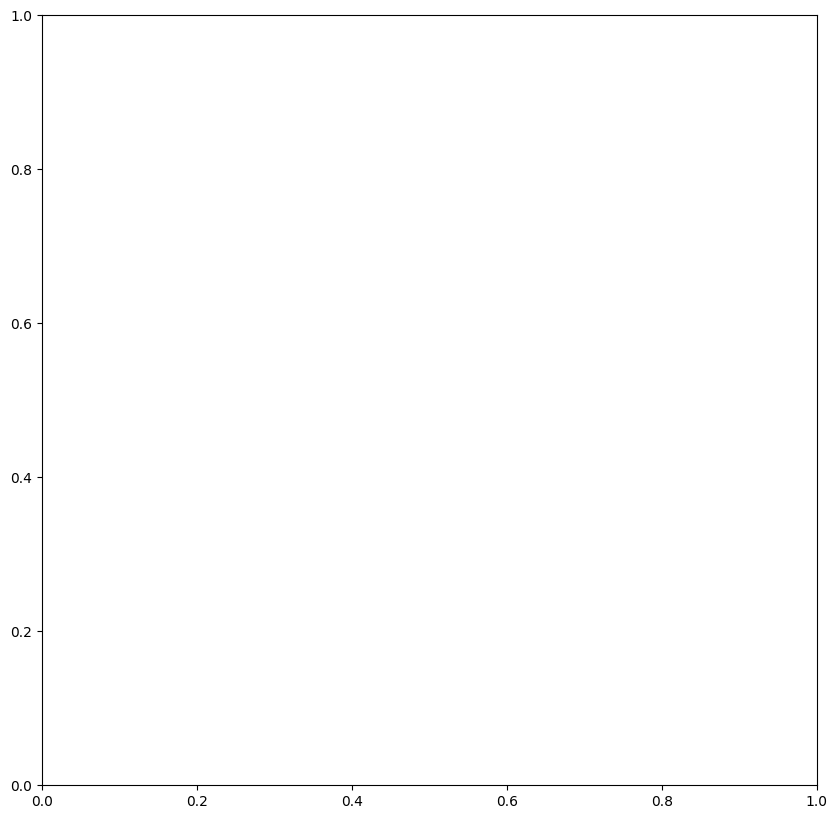

In [88]:
import wandb
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

fig, ax = plt.subplots(figsize=(10, 10))
metrics.confusion_matrix(y_true_classes, y_pred_classes, normalize='true')  
wandb.log({"confusion_matrix": wandb.Image(fig)})


# 8. Make Predictions

In [ ]:
res = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [91]:
actions[np.argmax(res[2])]

'O'

In [95]:
actions[np.argmax(y_test[1])]

'D'

# 9. Save Weights

In [96]:
model.save('../models/deepsignv1.0.1.keras')

: 

In [ ]:
del model

In [70]:
model.load_weights('../models/deepsignv1.0.0.keras')

# 10. Evaluation using Confusion Matrix and Accuracy

In [71]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [72]:
yhat = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [73]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [74]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[258,   3],
        [  2,   7]],

       [[261,   0],
        [  4,   5]],

       [[259,   2],
        [  1,   8]],

       [[261,   0],
        [  4,   5]],

       [[260,   1],
        [  2,   7]],

       [[260,   1],
        [  0,   9]],

       [[260,   1],
        [  3,   6]],

       [[256,   5],
        [  0,   9]],

       [[259,   2],
        [  1,   8]],

       [[261,   0],
        [  1,   8]],

       [[256,   5],
        [  5,   4]],

       [[258,   3],
        [  4,   5]],

       [[256,   5],
        [  1,   8]],

       [[256,   5],
        [  2,   7]],

       [[258,   3],
        [  4,   5]],

       [[260,   1],
        [  4,   5]],

       [[260,   1],
        [  1,   8]],

       [[259,   2],
        [  2,   7]],

       [[256,   5],
        [  1,   8]],

       [[258,   3],
        [  0,   9]],

       [[259,   2],
        [  4,   5]],

       [[259,   2],
        [  7,   2]],

       [[260,   1],
        [  0,   9]],

       [[258,   3],
        [  2, 

In [75]:
accuracy_score(ytrue, yhat)

0.725925925925926

In [76]:
from scipy import stats

In [79]:
# colors = [(245,117,16), (117,245,16)]
colors = [
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), 
    ]

In [80]:
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, 
              (0, 60 + num * 40), 
              (int(np.round(prob * 900)), 90 + num * 40), # Use np.round
              colors[num], -1) 
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [81]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # print(predictions)
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        # print(image)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            print(predictions[-10:], np.unique(predictions[-10:]))
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                print(actions[np.argmax(res)], res[np.argmax(res)])
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                           
                    else:
                        sentence.append(actions[np.argmax(res)])
                        print(sentence)

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
[13] [13]
J 0.996858
['J']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[13, 13] [13]
J 0.99686277
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[13, 13, 13] [13]
J 0.995031
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[13, 13, 13, 13] [13]
J 0.99764305
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[13, 13, 13, 13, 13] [13]
J 0.99392635
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[13, 13, 13, 13, 13, 13] [13]
J 0.99653256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[13, 13, 13, 13, 13, 13, 13] [13]
J 0.9933508
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[13, 13, 13, 13, 13, 13, 13, 13] [13]
J 0.99480575
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[13, 13, 13, 13, 13, 13, 13, 13, 13] [13]
J 0.99169344
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13] [13]
J 0.9966376
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13] [13]
J 0.9975157
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13] [13]
J 0.9982486
1/1 ━━━━━━━━━━━━━

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 28, 32)         │       159,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 28, 64)         │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 28, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 30)             │           990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,021,916 (3.90 MB)

 Trainable params: 340,446 (1.30 MB)

 Non-trainable params: 576 (2.25 KB)

 Optimizer params: 680,894 (2.60 MB)

# 11. Test in Real Time

In [ ]:
from scipy import stats

In [ ]:
# colors = [(245,117,16), (117,245,16)]
colors = [
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), 
    ]

In [ ]:
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, 
              (0, 60 + num * 40), 
              (int(np.round(prob * 900)), 90 + num * 40), # Use np.round
              colors[num], -1) 
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: 'NormalizedLandmark' object is not iterable

<Figure size 1800x1800 with 0 Axes>

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # print(predictions)
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        # print(image)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            print(predictions[-10:], np.unique(predictions[-10:]))
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                print(actions[np.argmax(res)], res[np.argmax(res)])
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                           
                    else:
                        sentence.append(actions[np.argmax(res)])
                        print(sentence)

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
[13] [13]
J 0.996858
['J']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[13, 13] [13]
J 0.99686277
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[13, 13, 13] [13]
J 0.995031
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[13, 13, 13, 13] [13]
J 0.99764305
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[13, 13, 13, 13, 13] [13]
J 0.99392635
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[13, 13, 13, 13, 13, 13] [13]
J 0.99653256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[13, 13, 13, 13, 13, 13, 13] [13]
J 0.9933508
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[13, 13, 13, 13, 13, 13, 13, 13] [13]
J 0.99480575
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[13, 13, 13, 13, 13, 13, 13, 13, 13] [13]
J 0.99169344
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13] [13]
J 0.9966376
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13] [13]
J 0.9975157
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13] [13]
J 0.9982486
1/1 ━━━━━━━━━━━━━